# Study notes on the Microphysics of Warm Clouds

References: 
1. "A Short course in Cloud Physics" by R. R. Rogers and M. K. Yau, 1989 (RY89)
2. Khvorostyanov, V., Curry, J. (2006). Aerosol size spectra and CCN activity spectra: Reconciling the lognormal, algebraic, and power laws Journal of Geophysical Research  111(D12)https://dx.doi.org/10.1029/2005jd006532

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

## Curvature effect on the saturated water vapor pressure
Because of the effect of surface tension, given the same temperature the saturated vapor pressure w.r.t. the curvature surface of cloud droplet is higher than that w.r.t. a flat water surface. The ratio between the two vapor pressure follows the following Eq. 6.1 of RY book.  

In [2]:
def esd_es_ratio_curve(r,T):
    
    '''
    This function computes the ratio between the saturated water vapor pressure w.r.t. 
    droplet surface with radius r to that w.r.t. a flat water surface
    
    Inputs: r [micro meter] radius of droplet
                  T [Kelvin] temperature
    
    Outputs:
            ratio [unitless] the ratio of the WV pressure at droplet surface to that at a flat water surface
    
    References:
            Equation (6.1) of RY89
    '''
    sigma_w =  0.075 #[N / m] air-water surface tension factor
    Rv = 461.5 #[[J / kg / K] specific gas constant of water vapor 
    rho = 1e3 #[kg/m^3]
    ratio = np.exp((2.0*sigma_w)/(Rv*T*rho*(r*1e-6)))
    
    return ratio

def plot_esw_es_ratio():
    
    T1 ,T2 = 273, 293
    Dp = np.logspace(-2,0,100)
    r1 = esd_es_ratio_curve(Dp/2,T1)
    r2 = esd_es_ratio_curve(Dp/2,T2)

    fig, ax = plt.subplots(1,2,figsize=[16,6])
    ax[0].semilogx(Dp,r1,c='b',label =r'$T=0 ^{o}C$')
    ax[0].semilogx(Dp,r2,c='r', label = r'$T=20 ^{o}C$')
    ax[0].grid(True)
    ax[0].set_xlabel(r'Droplet Diameter $D_{p} [\mu m]$ ',fontsize=18)
    ax[0].set_ylabel(r'$ {e_{s,w}(D_{p})}/{e_{s}}$',fontsize=18)
    #ax[0].yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))
    ax[0].xaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))
            
    ax[1].loglog(Dp,(r1-1)*100,c='b',label =r'$T=0 ^{o}C$')
    ax[1].loglog(Dp,(r2-1)*100 ,c='r', label = r'$T=20 ^{o}C$')
    ax[1].set_ylim([0.1,30])
    ax[1].grid(b=True, which='major', linestyle='-')
    ax[1].grid(b=True, which='minor', linestyle='--')
    ax[1].set_xlabel(r'Droplet Diameter $D_{p}  [\mu m]$ ',fontsize=18)
    ax[1].set_ylabel(r'super-saturation rato [%]',fontsize=18)
    ax[1].yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))
    ax[1].xaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))
    plt.show()

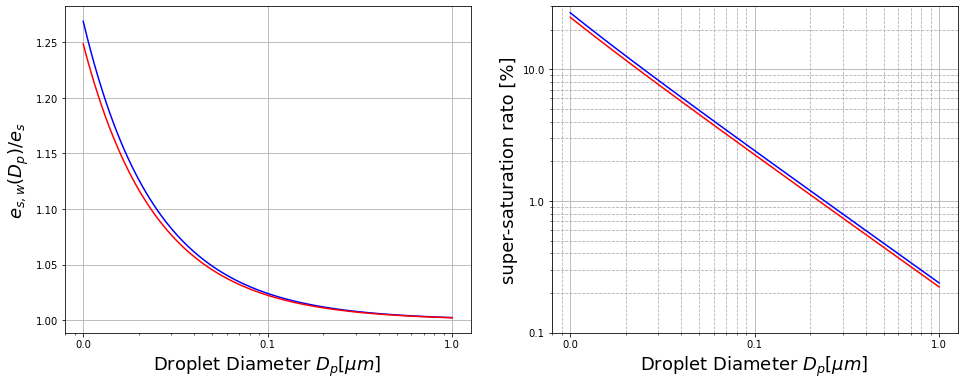

In [3]:
plot_esw_es_ratio()

## Effects of solution and Kohler Curve
A nonvolatile dissolved substance tends to lower the equilibrium vapor pressure of a liquid. Very roughly, the effect may be thought of as arising from the fact that, when solute is added to a liquid, some of the liquid molecules that were in the surface layer are replaced by solute molecules. If the vapor pressure of the solute is less than that of the solvent, the vapor pressure is reduced in proportion to the amount of solute present.  This effect can drastically lower the equilibrium vapor <br>

The Kohler theory takes into account of both the surface tension effect and the solution effect. 

In [4]:
def esd_to_es_ratio_Kohler(r, T, ms, Ms, i=2):
    '''
    This function computes the ratio between the saturated water vapor pressure w.r.t. 
    droplet surface with radius r and some solution (ms,MS) 
    to that w.r.t. a flat water surface according to Kohler theory
    
    References: Equations (6.6) (6.7) & (6.8) of RY89
    
    Inputs:
        r: droplet radius [micron meter]
        T: temperature [K]
        ms: mass of solute [g]
        Ms: molecular weight of solute [g/mole]
        i: degree of ionic disscociation i=2 by default
    Outputs:
        SS super-saturation [%]
        Dpc: critical droplet diameter [µm]
        SSc: critical super saturation [%]
    '''
    Mv = 18.01 #[g/mol]
    rho_liq = 1e3 # density of water [kg/m^3]
    r_drop = r*1e-6 # convert um to SI unit m
    v_drop = 4.0/3.0*np.pi*(r_drop**3)
    m_drop = v_drop * rho_liq
    
    sigma_w =  0.075 #[N / m] air-water surface tension factor
    Rv = 461.5 #[[J / kg / K] specific gas constant of water vapor 
    
    
    m_sol = ms * 1e-3 # convert g to kg
    
    c1 = 3.0/4.0/np.pi/rho_liq*Mv
    b  = c1*i*m_sol/Ms               #page 87 of RY
    
    c2 = 2.0*sigma_w/(Rv*rho_liq)
    a = c2/T                         #page 88 of RY
    
    ratio = 1.0 + a/r_drop - b/r_drop**3 #np.exp(a/r_drop)*(1.0-b/r_drop**3)
    
    #A = 0.66/T
    #B = 3.44*1e13*i*(ms/Ms)
    SS = (ratio-1.0) *100.0 # (np.exp(A/Dp - B/(Dp**3)) -1.0) *100.0
    
    rpc = np.sqrt(3.0*b/a) * 1e6                        #Eq.(6.7)
    SSc = np.exp(np.sqrt(4*a**3/27/b))  * 100.0 -100.0  #Eq.(6.8)
    return SS, rpc,SSc
    


In [5]:
def KohlerCurve_example():
    T = 293 #[k]
    # solute is NaCl
    Ds_dry1   = 0.05 #[um]
    Ds_dry2   = 0.1 #[µm]
    Ds_dry3   = 0.5 #[µm]
    rho_NaCl = 2.16 #[g/cm³]
    Ms_NaCl  = 58.44 #[g/mol]
    ms_NaCl1  = 1.0/6.0 * np.pi *  (Ds_dry1*1e-4)**3 * rho_NaCl
    ms_NaCl2  = 1.0/6.0 * np.pi *  (Ds_dry2*1e-4)**3 * rho_NaCl
    ms_NaCl3  = 1.0/6.0 * np.pi *  (Ds_dry3*1e-4)**3 * rho_NaCl
    i_NaCl   = 2
     
    rp = np.logspace(-1, 1, 100) # Radius of the water droplet solution 
     
    SS_NaCl1,Dpc1,SSc1 = esd_to_es_ratio_Kohler(rp, T, ms_NaCl1, Ms_NaCl, i_NaCl)
    SS_NaCl2,Dpc2,SSc2 = esd_to_es_ratio_Kohler(rp, T, ms_NaCl2, Ms_NaCl, i_NaCl)
    SS_NaCl3,Dpc3,SSc3 = esd_to_es_ratio_Kohler(rp, T, ms_NaCl3, Ms_NaCl, i_NaCl)

    fig,ax = plt.subplots(figsize=[10,8])
    ax.semilogx(rp,SS_NaCl1,lw=2.0,label=r'NaCl solution D=0.05 $\mu m$',c='b')
    ax.annotate('critical SS={:4.2f} %'.format(SSc1), xy=(Dpc1,SSc1), xytext=(Dpc1+0.1,SSc1+0.05),
            arrowprops=dict(facecolor='black', shrink=0.01),
            )
    ax.semilogx(rp,SS_NaCl2,lw=2.0,label=r'NaCl solution D=0.1 $\mu m$',c='g')
    ax.annotate('critical SS={:4.2f} %'.format(SSc2), xy=(Dpc2,SSc2), xytext=(Dpc2+0.1,SSc2-0.1),
            arrowprops=dict(facecolor='black', shrink=0.01),
            )
    ax.semilogx(rp,SS_NaCl3,lw=2.0,label=r'NaCl solution D=0.5 $\mu m$',c='r')
     
    ax.set_title('Kohler Curve example NaCl')
    ax.set_ylim([-0.5,0.5])
    ax.grid(b=True,which='major',ls='--')
    ax.grid(b=True,which='minor',ls='--')
    ax.axhline(0.0,lw=0.5,ls='--',c='r')
    ax.set_xlabel(r'Droplet Radius $[\mu m]$',fontsize=18)
    ax.set_ylabel('Super Saturation [%]',fontsize=18)
    ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))
    ax.legend(loc=0,fontsize='large')
    plt.show()
     

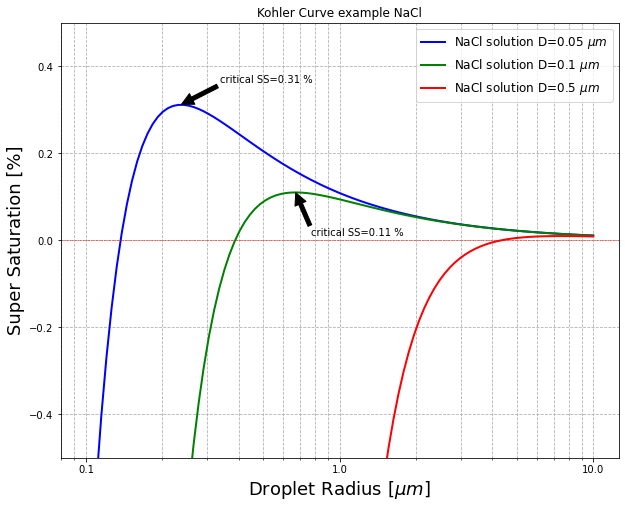

In [6]:
KohlerCurve_example()

The above figure shows three examples of Kohler curves. Each curve corresponds to the super saturation (SS) <br> 
$SS=\frac{e_s'(r)}{e_s(\infty)} -1$
where $e_s'(r)$ is the saturation ratio at the surface of solution droplet with radius of $r$ and $e_s(\infty)$ is the saturation ratio of water vapor at the surface of pure water with a flat surface. Take the blue curve for example. A small NaCl aerosol of the diameter $D=0.05 \mu m$ is solved in water droplets with radius from $0.1 \mu m$ to $10 \mu m$ (i.e., x-axis), the SS (i.e., y-axis) is the SS value for that NaCl soltuion. The green and red curves corresponds to NaCl aeosol with larger diameters. 
<br>

As we can see from the figure, for a given NaCl solution, there is a *critical* SS value (i.e., $SS^*$ in Eq. (6.7) of RY89). If the environmental SS ($SS_{env}$) is larger than the $SS^*$, then droplet with all sizes can grow. However, if $SS_{env}$) < $SS^*$, only a fraction of the droplet spectrum can grow. For example, for NaCl with $D=0.05 \mu m$ curve, if the  $SS_{env} =0.2%$ then only those droplets with $r>5\mu m$ can be "activated" and grow. Smaller droplets cannot be activated because they need higher SS to grow.


## Twomey Droplet Activation Scheme
The Kohler curve can be used to predict if a solution droplet with certain size can grow for a given environmental SS ($SS_{env}$). But the formation of a solution droplet takes several steps <br>
1. Hygroscopic aerosols absorb water and eventually become small solution droplets. These small droplet embryos are known as the __"haze"__ particles and they stay to the left of $SS^*$ in the  Kohler curve. 
2. Updraft in the air leads to supersaturation SS_{env}. 
3. All the embryo droplets with the $SS^* <SS_{env}$ are "activated"

In order to simulate these processes, we need to know 1) size, composition and hygroscopicity of the aerosol particles ; 2) the size distribution and solution concentration of embryo droplets to estimate the *critical* SS value (i.e., $SS^*$); 3) Updraft velocity and environmental meteorological condition to simulate $SS_{env}$ But in most cases, it is almost impossible to know all this.<br>

From the entire aerosol population, the __particles thought to be most important in natural cloud formation are those in the accumulation mode__, which corresponds approximately to the size interval of the so-called large aerosols. Particles smaller than about $0.1 \mu m$, even if hygroscopic, would require higher saturation ratios than those thought to exist in the free atmosphere to be activated. Particles larger than 4 or 5 $\mu m$ are much fewer in number (except near sources) but may serve as nuclei for some of the cloud droplets that are much larger than average size. (Particles with diameters between 0.1-1.0 µm are considered as the __accumulation mode__ representing a region of particle growth mainly due to the coagulation of particles with diameters smaller than 0.1 µm and from condensation of vapours onto existing particles, causing them to grow into this size range.)

Because of the difficulties associated with detailed simulation, cloud droplet activation is often parameterized in the numerical models (e.g., GCMs). One of the classical cloud droplet activation parameterization scheme is developed by Twomey (1959)

$ N_c = Cs^k $,

where $ s=(S-1)*100 \% $  is the percent supersaturation, $N_c$; is the number of nuclei per unit volume activated at supersaturations less than $s$, and $C$ and $k$ are parameters that depend on the airmass type. Typical ranges are, for maritime air, C = 30 to 300 $cm^{-3}$, $k = 0.3$ to $1.0$; for continental air, $C = 300$ to $3000 cm^{-3}$ , $k = 0.2$ to $2.0$.,

In [7]:
def Twomey_Droplet_Activation_s(s,C=300,k=0.5):
    '''
    Inputs:
    s: is the percent supersaturation, 
    C and k are parameters that depend on the airmass type;
    
    Outputs:
    Nc [#/cm^3]: the number of nuclei per unit volume activated at supersaturations less than s
    '''
    Nc = C*(s**k)
    return Nc

In [8]:
Nc = Twomey_Droplet_Activation_s(0.3,800,1.0)
print(Nc)

240.0


Twomey also obtained an expression for the peak supersaturation in the updraft, which may be approximated

$ s_{max} \approx 3.6[(1.6*10^{-3}W^{3/2})/C]^{1/(k+2)} $,

where $W$ is the updraft in $[cm/s]$

In [9]:
def Twomey_smax(W,C=300,k=0.5):
    '''
    Input:
    W: updraft velocity in cm/s
    C: parameter in #/cm^3
    
    Output:
    s_max: peak percentatge supersaturation in the updraft that can be used in Twomey Droplet Activation scheme

    '''
    smax = 3.6*((1.6*1e-3*(W**1.5))/C)**(1/(k+2))
    return smax

In [10]:
W = 100.0
smax = Twomey_smax(W,C=300,k=1.0)
print(smax)

0.6289779346101353


Assuming an activity spectrum of the form $ N_c = Cs^k $, Twomey (1959) showed that the droplet concentration N formed in an updraft of speed W can be expressed in terms of $W, C$, and $k$. For $k$ between 0.4 and 1.0, his result may be approximated by

$ N \approx 0.88C^{\frac{2}{k+2}}[7*10^{-2}W^{3/2}]^{\frac{k}{k+2}}$,



In [11]:
def Twomey_Droplet_Activation_W(W,C=300,k=0.6):
    '''
    Inputs:
    W: updraft velocity [cm/s]
    C: CN concentration [#/cm^3]
    k: parameter between 0.4 and 1.0
    
    Output:
    N: activated droplet number concentration [#/cm^3]
    '''
    
    a = 0.88*C**(2/(k+2))
    b = 0.07*W**(1.5)
    e = k/(k+2)
    N=a*(b**e)
    return N
    

In [12]:
W=80.0
N = Twomey_Droplet_Activation_W(W)
print(N)

174.6653031793748


In [13]:
W=np.linspace(1,50,50)
C=np.logspace(2,3,50)
Nc = np.zeros([50,50])
for iW in range(W.size):
    for iC in range(C.size):
        Nc[iC,iW] = Twomey_Droplet_Activation_W(W[iW],C=C[iC])

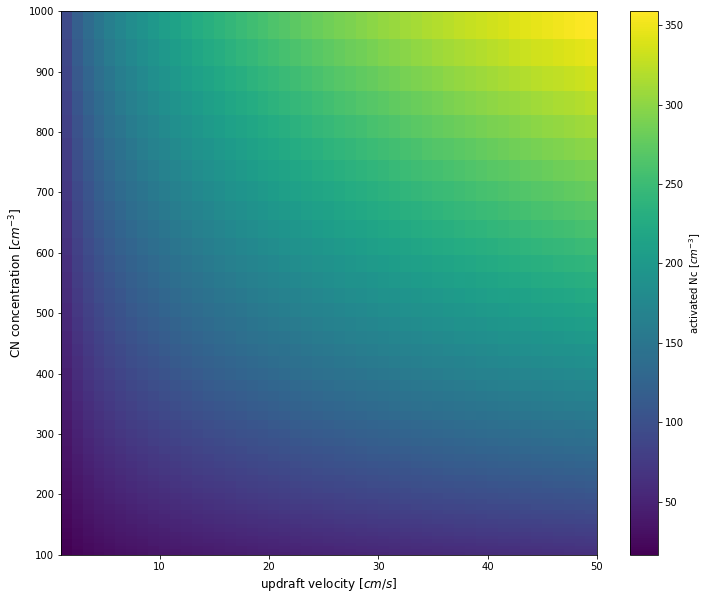

In [14]:
fig,ax = plt.subplots(figsize=[12,10])
h=ax.pcolor(W,C,Nc)
ax.set_xlabel(r'updraft velocity [$cm/s$]',fontsize='large')
ax.set_ylabel(r'CN concentration [$cm^{-3}$]',fontsize='large')
fig.colorbar(h,label=r'activated Nc [$cm^{-3}$]')

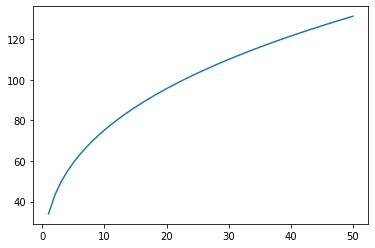

In [15]:
fig,ax = plt.subplots()
plt.plot(W,Nc[20,:])